<a href="https://colab.research.google.com/github/smriti-21/TheSparksFoundation_tasks/blob/main/To_predict_percentage_based_on_student's_study_hours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:Predict the percentage of an student based on the no. of study hours.This is a simple linear regression task as it involves just 2 variables.**



1. Firstly, we import all the required libraries to implement data analysis.

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

2. Next step is to import data. For this, we use the pandas library and read the data through the already given link in the problem statement.<br>Here is also a snippet of data which includes the first five data from the dataset.

In [2]:
link = "http://bit.ly/w-data"
student=pd.read_csv(link)
student.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


3. In this step, we have plotted the scatter graoph to manually find the scores' dependency on number of study hours.

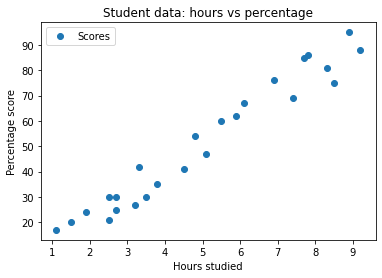

In [3]:
student.plot(x='Hours',y='Scores',style='o')
plt.title("Student data: hours vs percentage")
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()

Here, we can conclude that there is a linear relation between the score and the percentage and thus Linear Regression will be implemented.

4. Now, it's the time to prepare our data. We first divide the data into attributes and labels.

In [5]:
X = student.iloc[:, :-1].values
Y = student.iloc[:,1].values

5. Now, we divide the data into training and testing data sets. test_size=0.2 divide the data into 80/20. We perform the operation using sklearn train_test_split method.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,
random_state=0)

6. Now, we implement the Linear Regression and thus plot the graph to display the trained linear relation between the hours and percentage.

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

print("Training done")

Training done


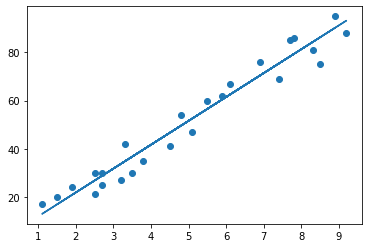

In [10]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

7. In this step, we predict the values based on our trained model and display a comparison table between the actual data and the predicted data. 

In [11]:
print(X_test)
Y_pred = regressor.predict(X_test)
df=pd.DataFrame({'Actual':Y_test, 'Predicted':Y_pred})
df

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Here, the predicted value for 9.25 hours(which was the question) is around 93.69%.

In [17]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours[0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted Score = 93.69173248737539


We know that an error basically is the absolute difference between the actual or true values and the values that are predicted. Absolute difference means that if the result has a negative sign, it is ignored.

Hence, MAE = True values – Predicted values

MAE takes the average of this error from every sample in a dataset and gives the output.

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.183859899002982
